<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/1_2_Kepler's_second_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The most popular one is 4-th order Runge-Kutta method:
    \begin{equation}
    \begin{aligned}
    \\& kx_1=\tau v_x(n)
    \\& ky_1=\tau v_y(n)
    \\& lx_1=\tau a_x(n)
    \\& ly_1=\tau a_y(n)
    \\& kx_2=\tau(v_x(n)+\frac{1}{2}lx_1)
    \\& ky_2=\tau(v_x(n)+\frac{1}{2}ly_1)
    \\& lx_2=\tau a_x(x(n)+\frac{1}{2}kx_1,v_x(n)+\frac{1}{2}lx_1,t+\frac{1}{2}\tau)
    \\& ly_2=\tau a_y(y(n)+\frac{1}{2}ky_1,v_y(n)+\frac{1}{2}ly_1,t+\frac{1}{2}\tau)
    \\& kx_3=\tau (v_x(n)+\frac{1}{2}lx_2)
    \\& ky_3=\tau (v_y(n)+\frac{1}{2}ly_2)
    \\& lx_3=\tau a_x(x(n)+\frac{1}{2}kx_2,v_x(n)+\frac{1}{2}lx_2,t+\frac{1}{2}\tau)
    \\& ly_3=\tau a_y(y(n)+\frac{1}{2}ky_2,v_y(n)+\frac{1}{2}ly_2,t+\frac{1}{2}\tau)
    \\& kx_4=\tau (v_x(n)+lx_3)
    \\& ky_4=\tau (v_y(n)+ly_3)
    \\& lx_4=\tau a_x(x(n)+kx_3,v_x(n)+lx_3,t+\tau)
    \\& ly_4=\tau a_y(x(n)+ky_3,v_y(n)+ly_3,t+\tau)
    \end{aligned}
    \end{equation}

Put together, we have,
  $$x(n+1)=x(n)+\frac{1}{6}(kx_1+2kx_2+2kx_3+kx_4)$$
  $$y(n+1)=y(n)+\frac{1}{6}(ky_1+2ky_2+2ky_3+ky_4)$$
  $$r(n+1)=\sqrt{x^2(n+1)+y^2(n+1)}$$
  $$v_x(n+1)=v_x(n)+\frac{1}{6}(lx_1+2lx_2+2lx_3+lx_4)$$
  $$v_y(n+1)=v_y(n)+\frac{1}{6}(ly_1+2ly_2+2ly_3+ly_4)$$
  $$v(n+1)=\sqrt{v_x^2(n+1)+v_y^2(n+1)}$$

use trangle to get the  area size：
$$S=0.5 * [(x1y2-x2y1)+(x2y3-x3y2)+(x3y1-x1y3)]=0.5 * (x(n-1)*y(n)-x(n)*y(n-1)$$

initial condition 
<br> $$a = 1,M = 1,m = 0.0123,e = 0.0549,μ=G(M + m)= 0.05288$$
    <br> set $$x(0) = a(1 − e), y(0) = 0, v_x(0) = 0, v_y(0) = μ(1 + e)/[a(1 − e)]$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
#initial condition
a = 1
M = 1
m = 0.0123
e = 0.0549
miu = 0.05288
tau=0.5
t_rk=[0]
vx_rk=[0]
vy_rk=[pow(miu*(1+e)/(a*(1-e)),1/2)]
v_rk=[pow(pow(vx_rk[0],2)+pow(vy_rk[0],2),1/2)]
x_rk=[a*(1-e)]
y_rk=[0]
r_rk=[pow(pow(x_rk[0],2)+pow(y_rk[0],2),1/2)]
s_rk=[0]
theta=[0]


In [ ]:
for i in range(1,56):
    t_rk.append(tau*i)
    kx1=tau*vx_rk[i-1]
    ky1=tau*vy_rk[i-1]

# r_rk需要更改吗
    lx1=tau*-miu*x_rk[i-1]/pow(r_rk[i-1],3)
    ly1=tau*-miu*y_rk[i-1]/pow(r_rk[i-1],3)

    kx2=tau*(vx_rk[i-1]+0.5*lx1)
    ky2=tau*(vy_rk[i-1]+0.5*ly1)

    lx2=tau*-miu*(x_rk[i-1]+0.5*kx1)/pow(r_rk[i-1],3)
    ly2=tau*-miu*(y_rk[i-1]+0.5*ky1)/pow(r_rk[i-1],3)

    kx3=tau*(vx_rk[i-1]+0.5*lx2)
    ky3=tau*(vy_rk[i-1]+0.5*ly2)

    lx3=tau*-miu*(x_rk[i-1]+0.5*kx2)/pow(r_rk[i-1],3)
    ly3=tau*-miu*(y_rk[i-1]+0.5*ky2)/pow(r_rk[i-1],3)
    
    kx4=tau*(vx_rk[i-1]+lx3)
    ky4=tau*(vy_rk[i-1]+ly3)

    lx4=tau*-miu*(x_rk[i-1]+kx3)/pow(r_rk[i-1],3)
    ly4=tau*-miu*(y_rk[i-1]+ky3)/pow(r_rk[i-1],3)

    x_rk.append(x_rk[i-1]+(1/6)*(kx1+2*kx2+2*kx3+kx4))
    y_rk.append(y_rk[i-1]+(1/6)*(ky1+2*ky2+2*ky3+ky4))
    r_rk.append(pow(pow(x_rk[i],2)+pow(y_rk[i],2),1/2))

    vx_rk.append(vx_rk[i-1]+(1/6)*(lx1+2*lx2+2*lx3+lx4))
    vy_rk.append(vy_rk[i-1]+(1/6)*(ly1+2*ly2+2*ly3+ly4))
    v_rk.append(pow(pow(vx_rk[i],2)+pow(vy_rk[i],2),1/2))


    s_rk.append(0.5 * (x_rk[i-1]*y_rk[i]-x_rk[i]*y_rk[i-1]))


 #   E_rk.append(0.5*k*np.power(x_rk[i],2)+0.5*m*np.power(v_rk[i],2))

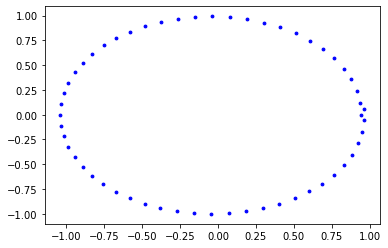

In [ ]:
plt.scatter(x_rk,y_rk,color='blue',s=8,label='Runge-Kutta-x')

(-2.0, 2.0)

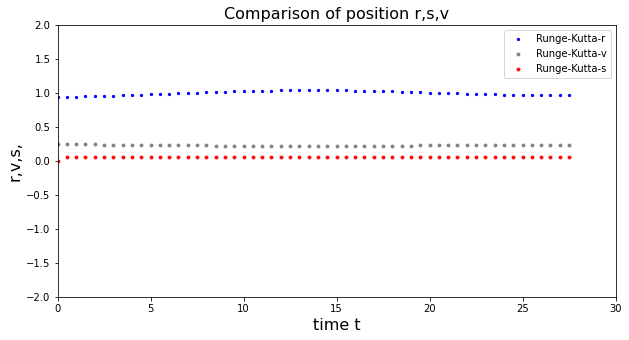

In [ ]:
#postion x plot
plt.figure(figsize=(10,5))
plt.scatter(t_rk,r_rk,color='blue',s=5,label='Runge-Kutta-r')
plt.scatter(t_rk,v_rk,color='grey',s=8,label='Runge-Kutta-v')
plt.scatter(t_rk,s_rk,color='red',s=8,label='Runge-Kutta-s')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('r,v,s,',size=16)
plt.title('Comparison of position r,s,v',size=16)
plt.xlim(0,30)
plt.ylim(-2,2)